#Convolutional Autoencoder

# Import relevant Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

# Loading the dataset
https://keras.io/api/datasets/fashion_mnist

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

# Visualize the images randomly

Label:2


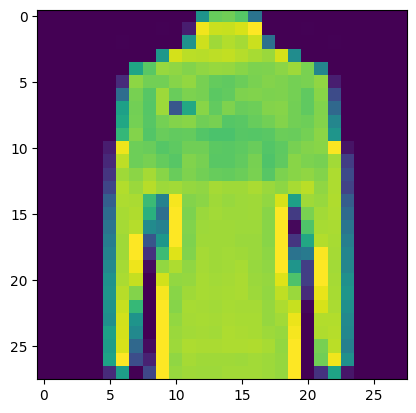

In [8]:
i = np.random.randint(0, 59999)

print(f'Label:{y_train[i]}')
plt.imshow(X_train[i]);

Label:9


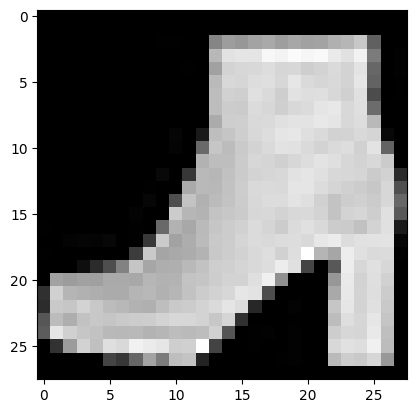

In [9]:
i = np.random.randint(0, 59999)

print(f'Label:{y_train[i]}')
plt.imshow(X_train[i], cmap='gray');

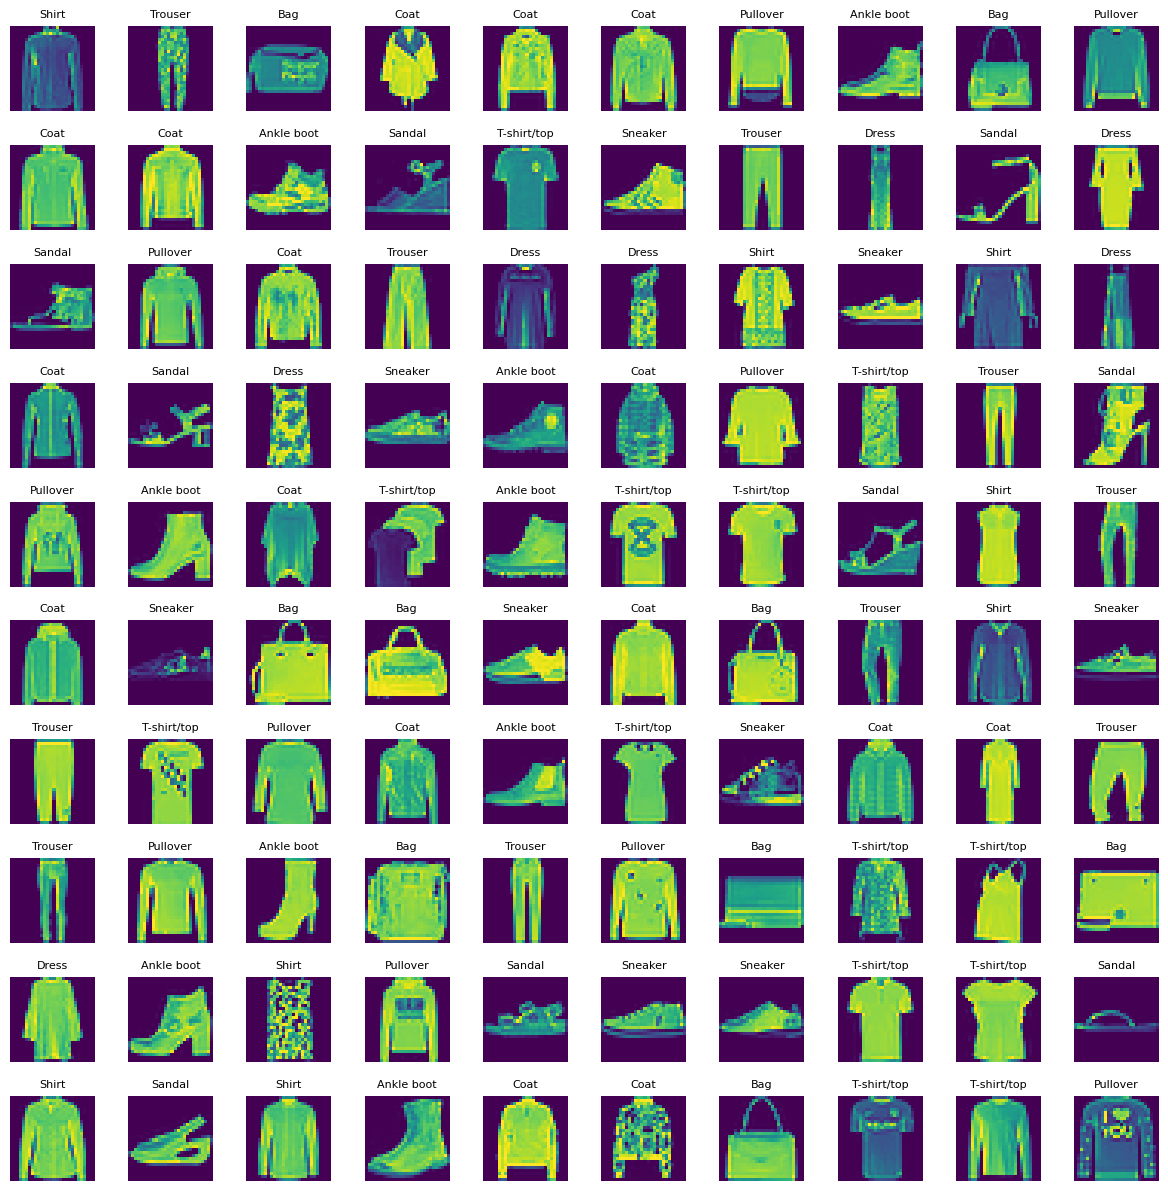

In [12]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15)) # creates a 10x10 axes canvas for displaying the images of axes=10x10 = 100
axes = axes.ravel() # since the axes is a matrix, we convert it to vector to fit in the canvas 1.e. axes = (10,10) -> 100
for i in np.arange(0, width*height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index]) # add cmap='gray' if you want grayscale display
  axes[i].set_title(classes[y_train[index]], fontsize=8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Preprocessing the Images

In [13]:
# vecotrize the images
X_train[0].min(), X_train[0].max()


(0, 255)

In [14]:
X_test[0].min(), X_test[0].max()

(0, 255)

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
X_train.shape  # (60000 images, 28 rows, 28 columns)

(60000, 28, 28)

In [19]:
X_test.shape # (10000 images, 28 rows, 28 columns)

(10000, 28, 28)

In [20]:
X_train = X_train.reshape(len(X_train), 28,28,1)

In [21]:
X_train.shape # 60000 images in a 784 row vector

(60000, 28, 28, 1)

In [22]:
X_test = X_test.reshape(len(X_test), 28,28,1)

In [23]:
X_test.shape # 10000 images in a 784 row vector

(10000, 28, 28, 1)

# Building and Training the Convolutional Autoencoder

In [ ]:
# linear autoencoder structure
# 784 - 128 - 64 - 32 - 64 - 128 - 784
# input - conv1 - conv2 - coding - decoding - conv3  - output

In [24]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder

autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [25]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output: (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

In [27]:
# compile the autoencoder
autoencoder.compile(optimizer='Adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [28]:
autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 70s 36ms/step - loss: 0.3108 - accuracy: 0.5041
Epoch 2/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2867 - accuracy: 0.5065
Epoch 3/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2827 - accuracy: 0.5070
Epoch 4/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2804 - accuracy: 0.5073
Epoch 5/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2789 - accuracy: 0.5075
Epoch 6/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2778 - accuracy: 0.5076
Epoch 7/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2769 - accuracy: 0.5077
Epoch 8/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2762 - accuracy: 0.5078
Epoch 9/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2756 - accuracy: 0.5080
Epoch 10/20
1875/1875 [==============================] - 68s 36m

# Encoding the Images

In [29]:
autoencoder.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [31]:
autoencoder.get_layer('flatten').output # the coding output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'flatten')>

In [32]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten').output)

In [33]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584   

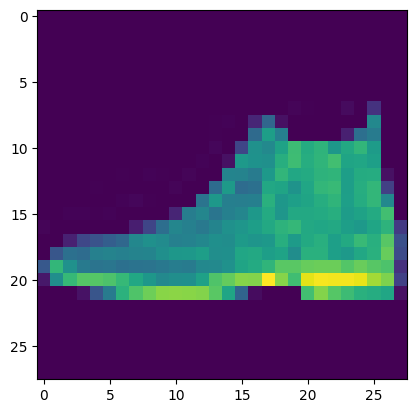

In [34]:
# Test encoder
plt.imshow(X_test[0].reshape(28, 28));

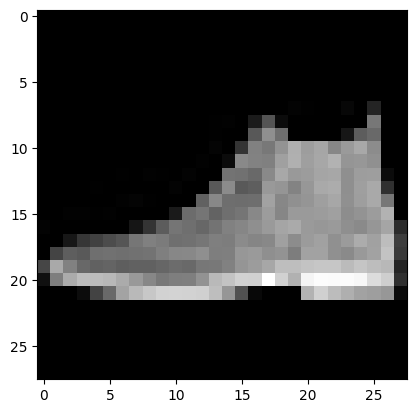

In [35]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray');

In [36]:
X_test[0].shape

(28, 28, 1)

In [37]:
X_test[0].reshape(1, -1).shape # means add 1 image with 784 flattened pixel

(1, 784)

In [41]:
coded_test_image = encoder.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [42]:
coded_test_image.shape

(10000, 128)

In [47]:
coded_test_image[0]

array([0.7712858 , 0.11224794, 0.3051676 , 0.5789175 , 0.15119776,
       0.438816  , 0.48365885, 0.5684679 , 0.69244194, 0.09021529,
       0.28749266, 0.74373674, 0.22653452, 0.35104626, 0.31841493,
       0.80641717, 0.7288357 , 0.16084206, 0.05723304, 1.0009296 ,
       0.427783  , 0.34993383, 0.52187157, 0.94422853, 0.44609278,
       0.22601077, 0.        , 0.6909759 , 0.5206241 , 0.47330445,
       0.537567  , 1.0930513 , 0.7453759 , 0.126042  , 0.3473073 ,
       0.9032849 , 0.07783791, 0.29706228, 0.6966468 , 0.84482163,
       0.64962995, 0.0394338 , 0.01904044, 0.44965827, 0.90444094,
       0.39562988, 1.4400868 , 1.1808686 , 2.1962805 , 1.5636449 ,
       0.        , 0.20122954, 1.9275606 , 0.        , 2.75068   ,
       0.9123187 , 2.1058147 , 1.853556  , 0.        , 0.8963416 ,
       0.8604852 , 0.        , 1.4193256 , 1.0253644 , 1.7447199 ,
       0.7936895 , 0.7933005 , 0.        , 1.7391707 , 0.24440277,
       1.8568299 , 1.0575174 , 2.0114632 , 2.2114658 , 0.02492

# Decoding the Images

In [49]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [50]:
decoded_image = autoencoder.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [51]:
decoded_image.shape

(10000, 28, 28, 1)

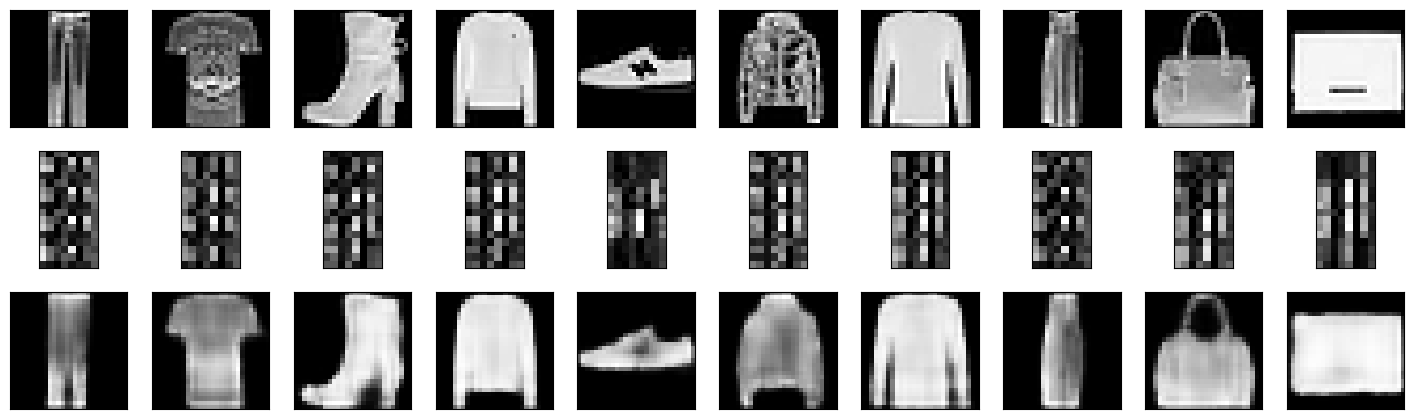

In [61]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(coded_test_image[image_index].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_image[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

In [62]:
16*8

128